# SEVERITY FACTOR MODEL



# Polynomial fits




An iterative loop that receives .csv files containing Temperature over time data for a single experiment and fits 3rd degree polynomial using NumPy, and calculates SF value using formula [----]. 

Note that as previously stated, R0 is determined individually per experiment and defined as the time until the system cools back to a temperature under 150 C.

The loop plots each experiment’s datapoints along with the polynomial fit and formula. 

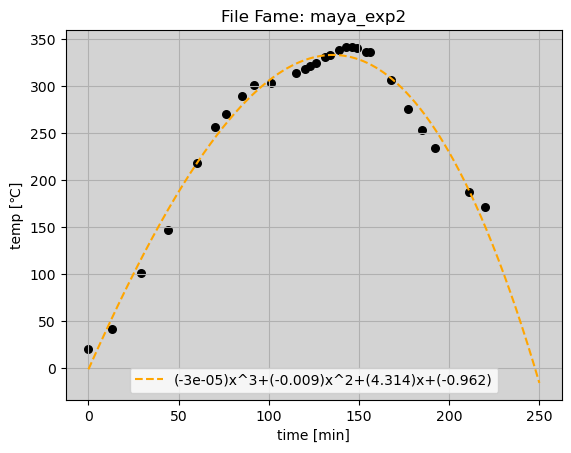

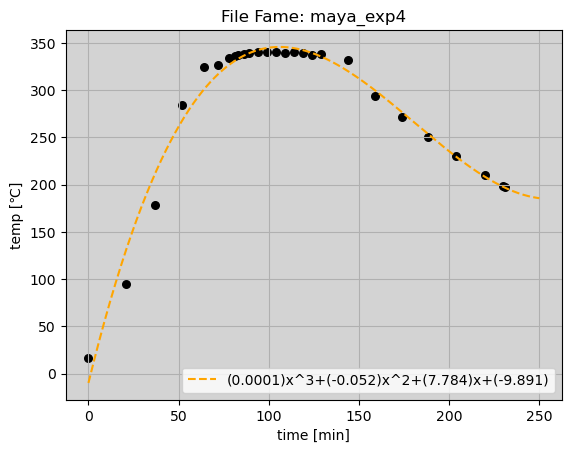

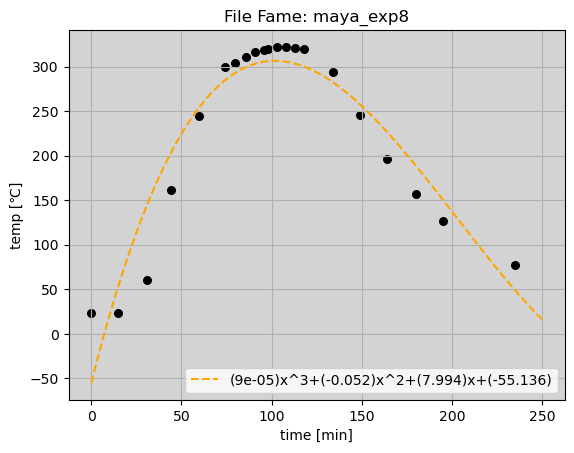

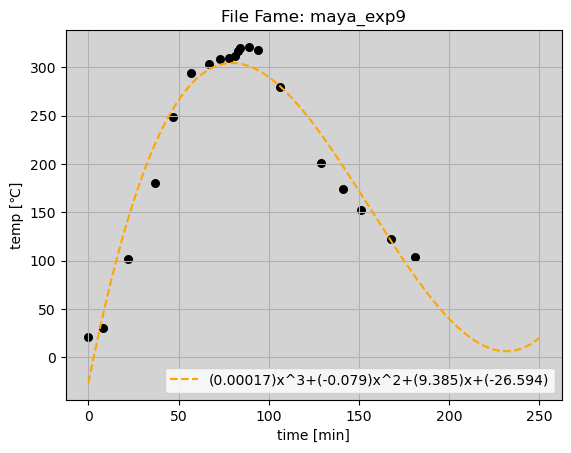

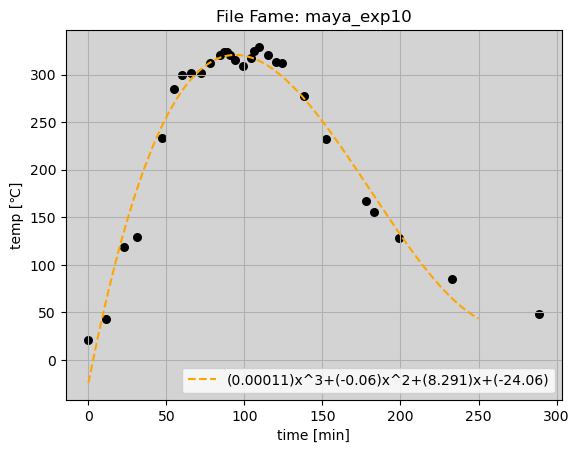

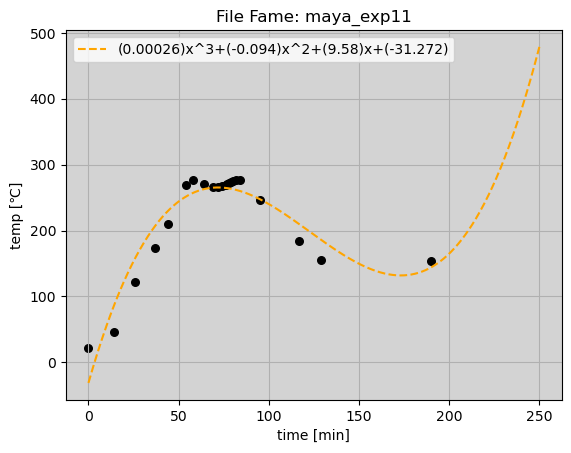

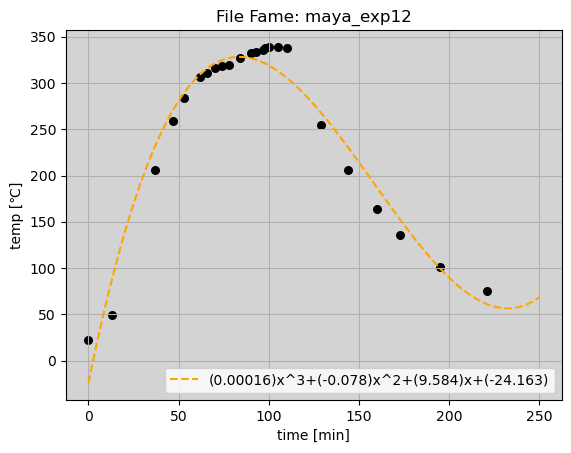

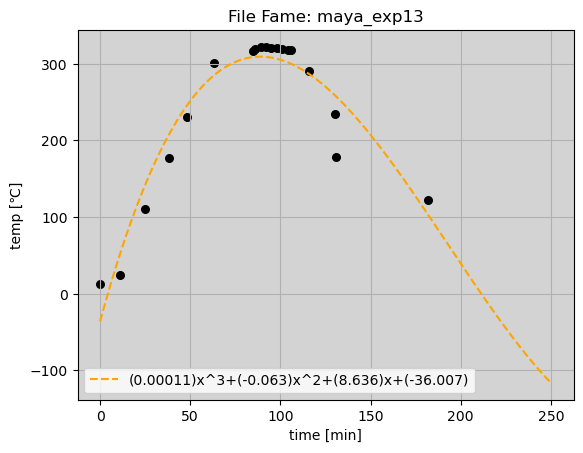

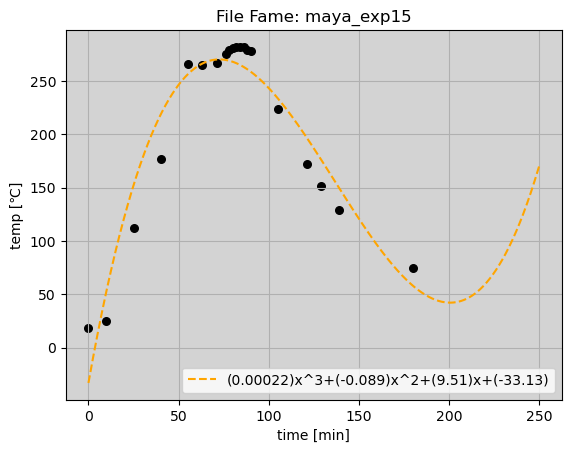

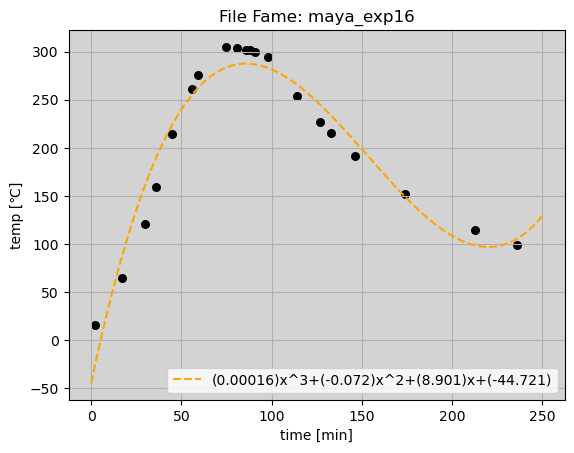

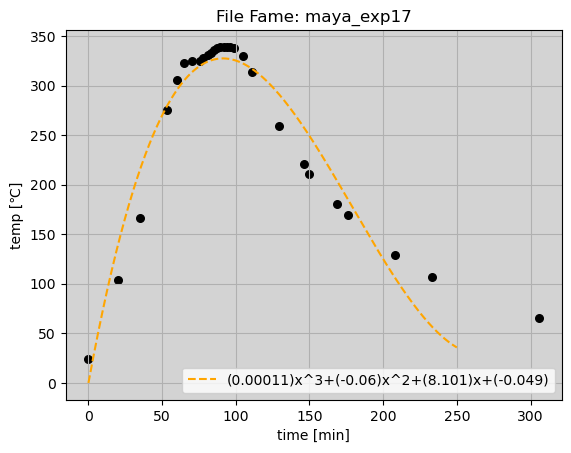

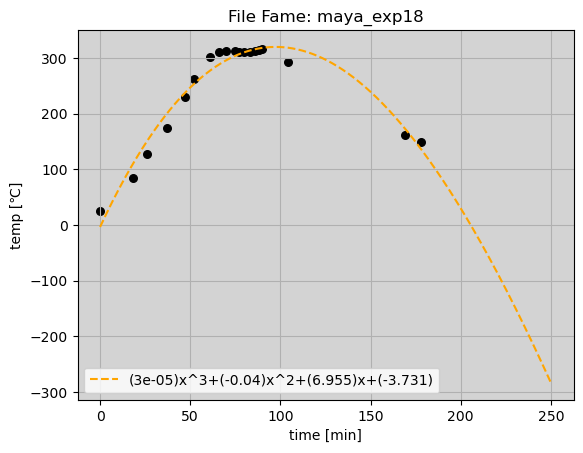

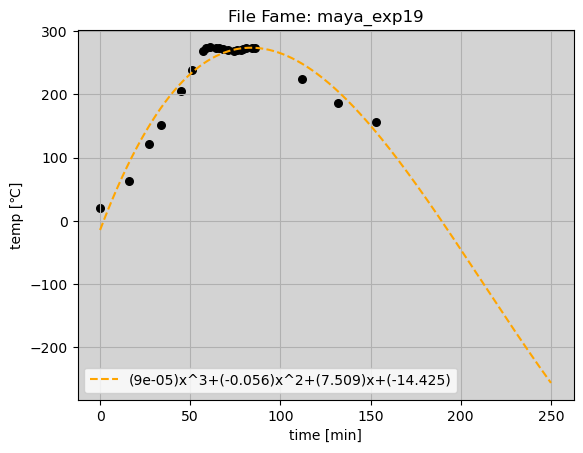

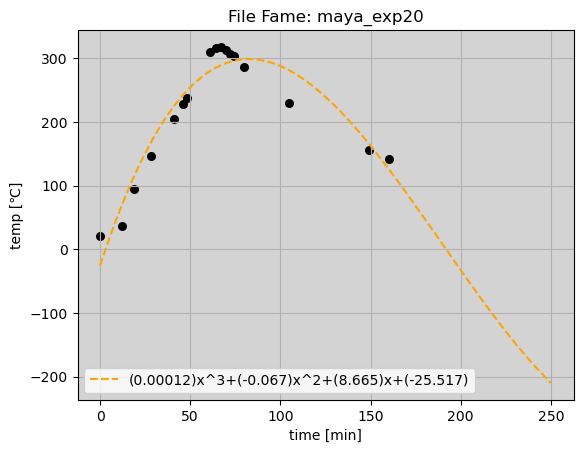

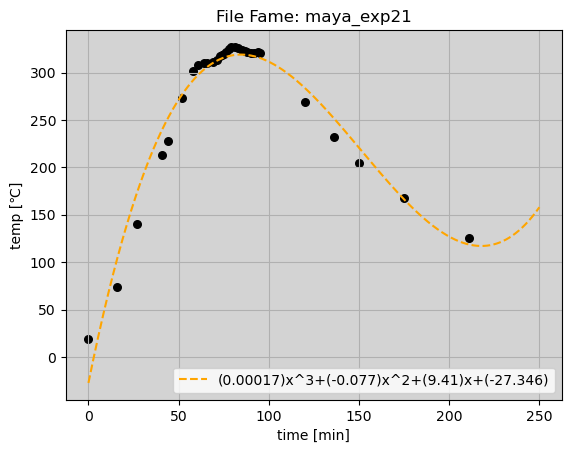

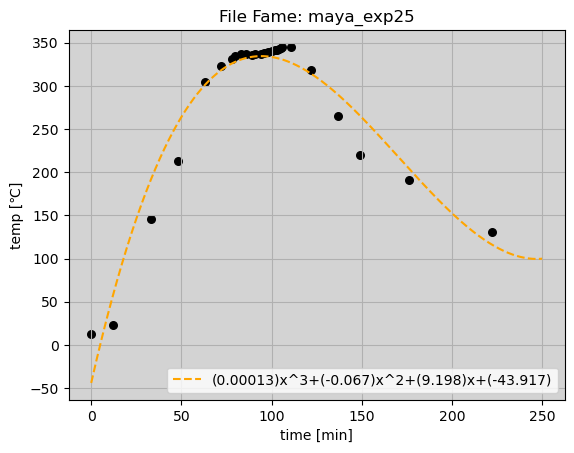

   Experiment name   SF value  R-Squared  polinomiyal_degree  coeff_x^3  \
0         exp1.csv   9.198581   0.962543                   3   0.000036   
1         exp2.csv  10.658711   0.981368                   3  -0.000034   
2         exp3.csv  10.855182   0.964485                   3   0.000062   
3         exp4.csv  10.942662   0.975635                   3   0.000096   
4         exp5.csv   9.879614   0.965292                   3   0.000155   
5         exp6.csv   8.751852   0.962582                   3   0.000184   
6         exp7.csv  10.242073   0.973724                   3   0.000057   
7         exp8.csv   9.718947   0.907961                   3   0.000086   
8         exp9.csv   9.468409   0.951914                   3   0.000169   
9        exp10.csv  10.085015   0.972880                   3   0.000110   
10       exp11.csv   8.280465   0.919175                   3   0.000257   
11       exp12.csv  10.202808   0.963597                   3   0.000164   
12       exp13.csv   9.68

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def rsq(x_values, y_values):
    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0, 1]
    r_squared = correlation_xy**2
    return r_squared


def itre_sf_file(file_list):
    dict_of_data = {"Experiment name": [], "SF value": [],
                    "R-Squared": [], "polinomiyal_degree": [], "coeff_x^3": [],"coeff_x^2": [],"coeff_x": [], "const": [] }

    for file_num in file_list:

        expx = pd.read_csv(file_num)
        i = 3
        x = np.linspace(0, 250, 1000)
        p6fit = np.polyfit(expx['time'], expx['temp'], i)
        r_squared = rsq(expx['temp'], np.polyval(p6fit, expx['time']))
        while r_squared < 0.9:
            p6fit = np.polyfit(expx['time'], expx['temp'], i + 1)
            r_squared = rsq(expx['temp'], np.polyval(p6fit, expx['time']))
            i = i + 1
        p6val = np.polyval(p6fit, x)

        x2 = np.arange(0, 300, 0.1)
        d = {'time': x2, 'temp': (np.polyval(p6fit, x2))}
        df = pd.DataFrame(d)
        y = (expx['temp'].idxmax())
        df2 = expx.iloc[y:]
        df3 = df[df['time'] >= df2['time'].min()]
        time_temp_back_to_150 = df3[(df3['temp'] > 149) & (df3['temp'] < 155)]['time'].min()

        if pd.isna(time_temp_back_to_150) == True:
            time_temp_back_to_150 = df2['time'].max()

        x3 = np.arange(0, time_temp_back_to_150, 1)
        ex = (np.polyval(p6fit, x3) - 100) / (14.75)
        sevv = np.sum(x3 * (np.e ** (ex)))
        sev = np.log10(sevv)
        dict_of_data["Experiment name"].append(file_num[5:])
        dict_of_data["SF value"].append(sev)
        dict_of_data["R-Squared"].append(r_squared)
        dict_of_data["polinomiyal_degree"].append(i)
        dict_of_data["coeff_x^3"].append(np.around(p6fit[0],decimals=6))
        dict_of_data["coeff_x^2"].append(np.around(p6fit[1],decimals=3))
        dict_of_data["coeff_x"].append(np.around(p6fit[2],decimals=3))
        dict_of_data["const"].append(np.around(p6fit[3],decimals=3))

   
        
        ax = plt.axes()
        ax.set_facecolor('lightgrey')
        plt.scatter(expx['time'], expx['temp'], color = 'black', s =30)
        plt.plot(x, p6val,color = 'orange',linestyle = '--' ,label = f'({np.around(p6fit[0], 5)})x^3+({np.around(p6fit[1], 3)})x^2+({np.around(p6fit[2], 3)})x+({np.around(p6fit[3], 3)})')
        plt.title(f'File Fame: {file_num[:-4]}', c='k')
        
        plt.xlabel('time [min]')
        plt.ylabel(f'temp ['u'\u2103]')
        plt.legend()
        
        plt.grid()
        plt.show()
    value_df = pd.DataFrame.from_dict(dict_of_data)
    print(value_df)

    return value_df

sf_loop1 = itre_sf_file(['maya_exp1.csv','maya_exp2.csv','maya_exp3.csv','maya_exp4.csv','maya_exp5.csv','maya_exp6.csv','maya_exp7.csv','maya_exp8.csv','maya_exp9.csv','maya_exp10.csv','maya_exp11.csv','maya_exp12.csv',
                    'maya_exp13.csv','maya_exp14.csv','maya_exp15.csv','maya_exp16.csv','maya_exp17.csv','maya_exp18.csv',
                    'maya_exp19.csv','maya_exp20.csv','maya_exp21.csv','maya_exp22.csv','maya_exp23.csv',
                    'maya_exp24.csv','maya_exp25.csv','maya_exp26.csv'])
# print(itre_sf_file(['maya_exp1.csv','maya_exp2.csv','maya_exp3.csv','maya_exp4.csv','maya_exp5.csv','maya_exp6.csv','maya_exp7.csv','maya_exp8.csv','maya_exp9.csv','maya_exp10.csv','maya_exp11.csv','maya_exp12.csv',
#                     'maya_exp13.csv','maya_exp14.csv','maya_exp15.csv','maya_exp16.csv','maya_exp17.csv','maya_exp18.csv',
#                     'maya_exp19.csv','maya_exp20.csv','maya_exp21.csv','maya_exp22.csv','maya_exp23.csv',
#                     'maya_exp24.csv','maya_exp25.csv','maya_exp26.csv']))

sf_loop1.to_csv('sf_loop1.csv')


# 3D Surface fit


Calculated SF values were plotted in accordance to the Temperature and <זמן שהייה> datapoints creating onto a 3D scatter. Using SciPy a planar surface representing Severity Factor as a function of Temperature and <זמן שהייה> was fitted. The function plots the surface and provides the coefficients.


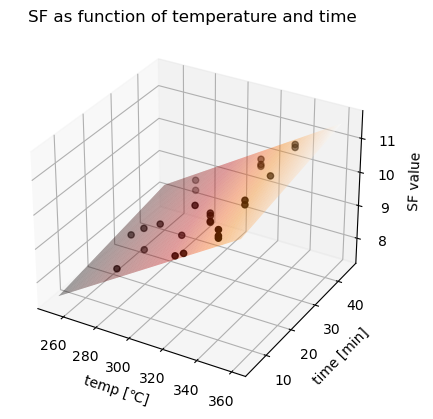

RMSE: 0.1912
R-squared: 0.9355
Severity Factor = 0.0306 * Temp + 0.0174 * Time + (-0.2887)


In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# test function
def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a*x + b*y + c

# setup test data
maya_all_table_csv = pd.read_csv("maya_all_table.csv")
sf_data = pd.read_csv("sf_loop1.csv")

# convert data into proper format
x_data = maya_all_table_csv['temp_c'].tolist()
y_data = maya_all_table_csv['time_min'].tolist()
z_data = sf_data['SF value'].tolist()
xData = maya_all_table_csv['temp_c'].to_numpy()
yData = maya_all_table_csv['time_min'].to_numpy()
zData = sf_data['SF value'].to_numpy()
data = [xData, yData, zData]

# get fit parameters from scipy curve fit
parameters, covariance = curve_fit(function, [x_data, y_data], z_data)

# create surface function model
# setup data points for calculating surface model
model_x_data = np.linspace(min(x_data)-20, max(x_data)+20, 100)
model_y_data = np.linspace(min(y_data)-5, max(y_data)+5, 100)
# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)
# calculate Z coordinate array
Z = function(np.array([X, Y]), *parameters)

fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z,cmap= 'gist_heat', rstride=1, cstride=1, alpha=0.4)
ax.scatter(x_data, y_data, z_data, color='black')
# set plot descriptions

ax.set_xlabel(f'temp ['u'\u2103]')
ax.set_ylabel('time [min]')
ax.set_zlabel('SF value')
plt.title('SF as function of temperature and time ')

plt.show()

modelPredictions = function(data, *parameters)

absError = modelPredictions - zData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(zData))
print('RMSE:', np.around(RMSE,4))
print('R-squared:',np.around( Rsquared,4))
print(f'Severity Factor = {np.around(parameters[0],4)} * Temp + {np.around(parameters[1],4)} * Time + ({np.around(parameters[2],4)})')
# print('fitted prameters:')
# for parm in parameters:
#     print(np.around(parm,6))



# 3D Surface Validation  


A “leave one out” cross validation method was used. A loop omits one experiment from the dataset, fits a new planar surface using the remaining experiments and outputs a list of measured and predicted values, RMSE, R Squared and Relative Errors.
The relative error distribution is presented in a histrogram.

In [5]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a*x + b*y + c

maya_all_table_csv = pd.read_csv("maya_all_table.csv")
sf_data = pd.read_csv("sf_loop1.csv")
sf_val = sf_data['SF value'].tolist()
errs = []
s_z_table = []
RMSE_table = []
R_squared_tabale = []
for j in range(26):
    j_x = maya_all_table_csv['temp_c'][j]
    j_y = maya_all_table_csv['time_min'][j]
    j_z = sf_data['SF value'][j]
    table = maya_all_table_csv.drop(j)
    sev = sf_data.drop(j)
    x_data = table['temp_c'].tolist()
    y_data = table['time_min'].tolist()
    z_data = sev['SF value'].tolist()
    xData = table['temp_c'].to_numpy()
    yData = table['time_min'].to_numpy()
    zData = sev['SF value'].to_numpy()
    data = [xData, yData, zData]




    # get fit parameters from scipy curve fit
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)

    # create surface function model
    # setup data points for calculating surface model
#     model_x_data = np.linspace(min(x_data) - 20, max(x_data) + 20, 100)
#     model_y_data = np.linspace(min(y_data) - 5, max(y_data) + 5, 100)
#     # create coordinate arrays for vectorized evaluations
#     X, Y = np.meshgrid(model_x_data, model_y_data)
#     # calculate Z coordinate array
#     Z = function(np.array([X, Y]), *parameters)

#     fig = plt.figure()
#     ax = plt.axes(projection='3d')
#     surf = ax.plot_surface(X, Y, Z, cmap='gist_heat', rstride=1, cstride=1, alpha=0.4)
#     ax.scatter(x_data, y_data, z_data, color='black')
#     # set plot descriptions

#     ax.set_xlabel('temp')
#     ax.set_ylabel('time [min]')
#     ax.set_zlabel('SF value')

#     # plt.show()

    modelPredictions = function(data, *parameters)

    absError = modelPredictions - zData

    SE = np.square(absError)  # squared errors
    MSE = np.mean(SE)  # mean squared errors
    RMSE = np.sqrt(MSE)  # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(zData))
    s_z = j_x*parameters[0]+j_y*parameters[1]+parameters[2]
    s_z_table.append(s_z)
    err = np.around(np.abs(((s_z - j_z)/j_z)*100),3)
    errs.append(np.around(err,6))
    RMSE_table.append(np.around(RMSE,3))
    R_squared_tabale.append(np.around(Rsquared,3))
#     print(f'\n----<#{j+1}>----\n')
#     print('RMSE:', RMSE)
#     print('R-squared:', Rsquared)
#     print(f's_z: {s_z} , j_z: {j_z} ')
#     print(f'relative error: {np.around(err,6)} %')



print(f'\n--------------------\n')
print(f'relative errors are:')
print(errs)
print(f'\n--------------------\n')
print(f'RMSE table:')
print(RMSE_table)
print(f'\n--------------------\n')
print(f'R-squared table:')
print(R_squared_tabale)

df = pd.DataFrame([sf_val,s_z_table])

df1 = pd.DataFrame(s_z_table)
df2 = [df,df1]
df3 = pd.concat(df2)
df = df.T
df.columns =['measured','predicted']
sf_val = df.to_csv('sf_val.csv')
print(f'\n--------------------\n')
print(df)
plt.hist(errs, bins=5, color = 'orange')
plt.xlabel('relative errors [%]')
plt.ylabel('abundance')
plt.title('Relative errors distribution') 

plt.show()



--------------------

relative errors are:
[3.134, 0.202, 0.465, 1.432, 0.282, 3.232, 0.454, 1.444, 2.46, 1.325, 4.824, 1.002, 1.804, 1.481, 0.652, 3.246, 0.272, 4.914, 3.188, 2.427, 1.057, 1.958, 1.158, 1.713, 0.15, 3.814]

--------------------

RMSE table:
[0.187, 0.195, 0.195, 0.193, 0.195, 0.188, 0.195, 0.193, 0.19, 0.193, 0.18, 0.194, 0.192, 0.193, 0.195, 0.186, 0.195, 0.169, 0.188, 0.19, 0.194, 0.192, 0.194, 0.192, 0.195, 0.184]

--------------------

R-squared table:
[0.939, 0.931, 0.929, 0.93, 0.935, 0.935, 0.934, 0.937, 0.938, 0.936, 0.935, 0.935, 0.937, 0.933, 0.926, 0.939, 0.934, 0.951, 0.934, 0.938, 0.936, 0.937, 0.934, 0.935, 0.933, 0.94]

--------------------

     measured  predicted
0    9.198581   8.910294
1   10.658711  10.637180
2   10.855182  10.804720
3   10.942662  10.785987
4    9.879614   9.851789
5    8.751852   9.034741
6   10.242073  10.195615
7    9.718947   9.859249
8    9.468409   9.701334
9   10.085015  10.218609
10   8.280465   8.679926
11  10.202808  1